# 10720PHYS401200 Homework-2

## Monte Carlo simulation of the 2D Ising model

Write a program/function to perform a Monte Carlo simulation of the 2D Ising model in zero magnetic field.

$$
  H = -J \sum_{\langle i,j\rangle} \sigma_i \sigma_j,
$$

where $\sigma=\pm 1$ and the sum is over nearest-neighbor pairs of sites on a square lattice of $N = L \times L$ sites.

You should implement two different update schemes:
* Sequential update.
* Random update.

For both schemes, we define a Monte Carlo sweep as $N=L\times L$ local spin updates(flip attemps). At the end each Monte Carlo sweep, i.e., after $N$ local spin updates(flip attemps), you should measure the following quantities:
* Total energy $E$ and $E^2$.
* Total matnetization $M$, $|M|$, and $M^2$.

At the end of the simulation, calculate following quantities:
* Specific heat $C_v$
$$
  C_v \equiv \frac{\partial \langle E\rangle}{\partial T} = \frac{1}{k_B T^2} \left( \langle E^2\rangle -\langle E\rangle^2 \right).
$$
* Susceptbility of $M$
$$ 
  \chi_M \equiv \frac{\partial \langle M\rangle}{\partial h} = \frac{1}{k_B T} \left( \langle M^2\rangle -\langle M\rangle^2 \right).
$$
* Susceptbility of $|M|$
$$ 
  \chi_{|M|} \equiv \frac{\partial \langle |M|\rangle}{\partial h} = \frac{1}{k_B T} \left( \langle M^2\rangle -\langle |M|\rangle^2 \right).
$$

## Problem 1: $2\times 2$ lattice

The exact results for $2\times 2$ lattices are (cf. arXiv:0803.0217):
$$
  Z=2 e^{8\beta J} + 12 + 2 e^{-8\beta J}.
$$

$$ 
  \langle E\rangle = -\frac{1}{Z} \left[ 2(8)e^{8\beta J} + 2(-8)e^{-8\beta J} \right].
$$

$$ 
  \langle E^2\rangle = \frac{1}{Z} \left[ 2(64)e^{8\beta J} + 2(64)e^{-8\beta J} \right].
$$

$$ 
  \langle |M|\rangle = \frac{1}{Z} \left[ 2(4)e^{8\beta J} + 8(2) \right].
$$

$$ 
  \langle M^2\rangle = \frac{1}{Z} \left[ 2(16)e^{8\beta J} + 8(4) \right].
$$

* Plot specific heat per site $C_v/N$ vs temperature using exat result, MC (sequential update), MC (random update).
* Plot susceptbility of $|M|$ per site $\chi_{|M|}/N$ vs temperature using exat result, MC (sequential update), MC (random update).

You should perform at least $10^3$ Monte Carlo sweeps.

In [1]:
# Problem 1

import numpy as np
import matplotlib.pyplot as plt

class Ising_model:

    kb = 1  #1.38064852e-23

    def __init__(self, L, T):
        self.L = L
        self.T = T
        spin_conf = np.zeros((L, L))
        for i in range(L):
            for j in range(L):
                spin = np.random.randint(-1, 2)
                while spin == 0:
                    spin = np.random.randint(-1, 2)
                spin_conf[i][j] = spin
        self.s = spin_conf

    def visual(self, verbose=True):
        L = self.L
        demo = np.zeros(np.shape(self.s), dtype=str)
        num_up, num_down = 0, 0
        for i in range(L):
            for j in range(L):
                if self.s[i][j] == 1.0:
                    demo[i][j] = '↑'
                    num_up += 1
                elif self.s[i][j] == -1.0:
                    demo[i][j] = '↓'
                    num_down += 1
        print(demo)
        if verbose == True:
            print('Spin_up=%i ;Spin_down=%i' % (num_up, num_down))

    def energy(self):
        L = self.L
        E = 0
        J = 1
        for i in range(L):
            for j in range(L):
                E += self.s[i, j] * (self.s[
                    (i + 1) % L, j] + self.s[i, (j + 1) % L])
        energy = -J * E
        return energy

    def magnet(self):
        L = self.L
        M = 0.0
        for i in range(L):
            for j in range(L):
                M += self.s[i, j]
        return M

    def dE(self, i, j):
        L = self.L
        NB = self.s[(i + 1) % L, j] + self.s[i, (j + 1) % L] + self.s[
            (i - 1) % L, j] + self.s[i, (j - 1) % L]
        dE = 2 * self.s[i, j] * NB
        return dE

    def mc_method_sq(self, verbose1=False, verbose2=False):
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for i in range(L):
            for j in range(L):
                if self.dE(i, j) < 0:
                    self.s[i][j] *= -1
                    accept += 1
                elif self.dE(i, j) >= 0:
                    prob = np.exp(-beta * self.dE(i, j))
                    if np.random.random() < prob:
                        self.s[i][j] *= -1
                        accept += 1
                if verbose1 == True:
                    print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                    self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' % (L, T,
                                                    (100 * accept / L**2)) +
                  '%')
        return self.s

    def mc_method_rnd(self, verbose1=False, verbose2=False):
        T = self.T
        kb = self.kb
        L = self.L
        accept = 0
        beta = 1 / T / kb
        for n in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if self.dE(i, j) < 0:
                self.s[i][j] *= -1
                accept += 1
            elif self.dE(i, j) >= 0:
                prob = np.exp(-beta * self.dE(i, j))
                if np.random.random() < prob:
                    self.s[i][j] *= -1
                    accept += 1
            if verbose1 == True:
                print('\n[%i, %i], dE=%.1f' % (i, j, self.dE(i, j)))
                self.visual()
        if verbose2 == True:
            print('L=%i, T=%i, Accept_rate=%.2f' % (L, T,
                                                    (100 * accept / L**2)) +
                  '%')
        return self.s
    
def exact_result(L, T_list):
    kb, J = 1, 1
    C, Chi = [], []
    for T in T_list:
        beta = 1/kb/T
        Z = 2*np.exp(8*beta*J) + 12 + 2*np.exp(-8*beta*J)
        E_mean = -(1/Z) * (2*(8)*np.exp(8*beta*J) + 2*(-8)*np.exp(-8*beta*J))
        E_sq_mean = (1/Z) * (2*(64)*np.exp(8*beta*J) + 2*(64)*np.exp(-8*beta*J))
        M_mean  = (1/Z) * (2*(4)*np.exp(8*beta*J) + 8*(2))
        M_sq_mean = (1/Z) * (2*(16)*np.exp(8*beta*J) + 8*(4))
        C.append((E_sq_mean - E_mean**2)/kb/T/T/L/L)
        Chi.append((M_sq_mean - M_mean**2)/kb/T/L/L)
    return C, Chi, T_list

L=2


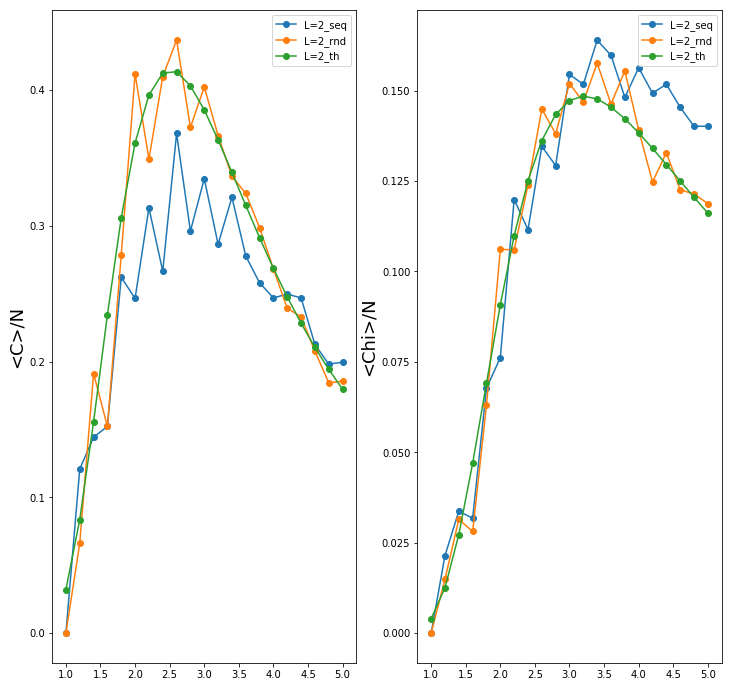

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

L_list = [2]
T_list = list(np.arange(1, 5.2, 0.2))
N_rnd = 1000

for L in L_list:
    print('L=%i' % L)

    Mag_seq, Eng_seq, C_seq, Chi_seq = [], [], [], []
    Mag_rnd, Eng_rnd, C_rnd, Chi_rnd = [], [], [], []
    for T in T_list:
        sample1 = Ising_model(L, T)
        sample2 = Ising_model(L, T)
        sample1.s = np.ones((sample1.L, sample1.L))
        sample2.s = np.ones((sample2.L, sample2.L))
        
        mag_seq, eng_seq, mag_2_seq, eng_2_seq = [], [], [], []
        mag_rnd, eng_rnd, mag_2_rnd, eng_2_rnd = [], [], [], []
        for run in range(N_rnd):
            sample1.mc_method_sq()
            mag_seq.append(abs(sample1.magnet()))
            eng_seq.append(sample1.energy())
            mag_2_seq.append(sample1.magnet()**2)
            eng_2_seq.append(sample1.energy()**2)
            
            sample2.mc_method_rnd()
            mag_rnd.append(abs(sample2.magnet()))
            eng_rnd.append(sample2.energy())
            mag_2_rnd.append(sample2.magnet()**2)
            eng_2_rnd.append(sample2.energy()**2)
            
        mean_mag_seq = sum(mag_seq) / len(mag_seq)
        mean_eng_seq = sum(eng_seq) / len(eng_seq)
        mean_mag_2_seq = sum(mag_2_seq) / len(mag_2_seq)
        mean_eng_2_seq = sum(eng_2_seq) / len(eng_2_seq)
        C_seq.append(((mean_eng_2_seq - mean_eng_seq**2) / sample1.kb / T / T) / (sample1.L**2))
        Chi_seq.append(((mean_mag_2_seq - mean_mag_seq**2) / sample1.kb / T) / (sample1.L**2))
        Eng_seq.append(mean_eng_seq / sample1.L**2)
        Mag_seq.append(mean_mag_seq / sample1.L**2)
        
        mean_mag_rnd = sum(mag_rnd) / len(mag_rnd)
        mean_eng_rnd = sum(eng_rnd) / len(eng_rnd)
        mean_mag_2_rnd = sum(mag_2_rnd) / len(mag_2_rnd)
        mean_eng_2_rnd = sum(eng_2_rnd) / len(eng_2_rnd)
        C_rnd.append(((mean_eng_2_rnd - mean_eng_rnd**2) / sample2.kb / T / T) / (sample2.L**2))
        Chi_rnd.append(((mean_mag_2_rnd - mean_mag_rnd**2) / sample2.kb / T) / (sample2.L**2))
        Eng_rnd.append(mean_eng_rnd / sample2.L**2)
        Mag_rnd.append(mean_mag_rnd / sample2.L**2)
        
    axes[0].plot(T_list, C_seq, '-o', label=('L=%i' % L) + '_seq')
    axes[0].plot(T_list, C_rnd, '-o', label=('L=%i' % L) + '_rnd')
    
    axes[1].plot(T_list, Chi_seq, '-o', label=('L=%i' % L) + '_seq')
    axes[1].plot(T_list, Chi_rnd, '-o', label=('L=%i' % L) + '_rnd')
    
    C_th, Chi_th, T_list = exact_result(L, T_list)
    axes[0].plot(T_list, C_th, '-o', label=('L=%i' % L) + '_th')
    axes[1].plot(T_list, Chi_th, '-o', label=('L=%i' % L) + '_th')
    
axes[0].legend()
axes[1].legend()

axes[0].set_ylabel('<C>/N', fontsize=18)
axes[1].set_ylabel('<Chi>/N', fontsize=18)

plt.show()

## Problem 2: Symmetry-breaking and finite systems: Reversal time

Start from "all up" spin configuration and perform at least $10^4$ Monte Carlo sweeps for a $L=8$ and a $L=16$ systems for temperature of $T=2.2$. Plot $M$ as function of MC sweeps.

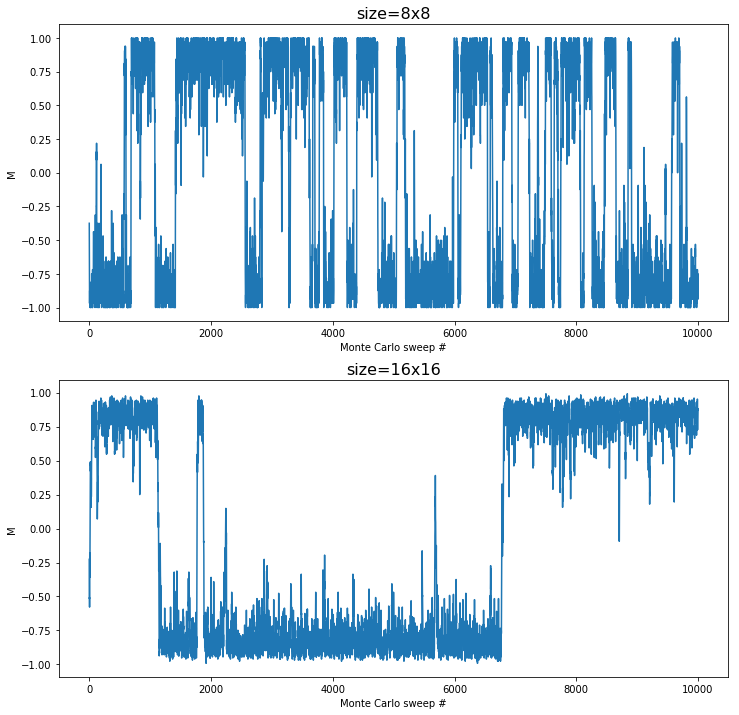

In [3]:
# Problem 2

L_list = [8, 16]; T = 2.2; rnd = 10000

fig, axes = plt.subplots(len(L_list), 1, figsize=(12,12))
for i in range(len(L_list)):
    sample = Ising_model(L_list[i], T)
    M = []
    for run in range(rnd):
        sample.mc_method_sq()
        M.append(sample.magnet()/L_list[i]**2)
    x = np.linspace(0, rnd-1, rnd)
    axes[i].plot(x, M)
    axes[i].set_ylabel('M')
    axes[i].set_xlabel('Monte Carlo sweep #')
    axes[i].set_title('size=%ix%i' % (L_list[i], L_list[i]), fontsize=16)
plt.show()

## Problem 3: $8\times 8$ lattice

Perform at least $10^3$ Monte Carlo sweeps for a $L=8$ system for temperature of $T=1, 2, 3, 4, 5, 6, 7, 8$. Print $E$, $C$, $|M|$, $\chi_{|M|}$ for each $T$.

In [4]:
# Problem 3

L_list = [8]
T_list = list(np.arange(1, 9, 1))
N_rnd = 1000

for L in L_list:

    Mag, Eng, C, Chi = [], [], [], []
    for T in T_list:
        sample = Ising_model(L, T)
        sample.s = np.ones((sample.L, sample.L))

        mag, eng, mag_2, eng_2 = [], [], [], []
        for run in range(N_rnd):
            sample.mc_method_rnd()
            mag.append(abs(sample.magnet()))
            eng.append(sample.energy())
            mag_2.append(sample.magnet()**2)
            eng_2.append(sample.energy()**2)

        mean_mag = sum(mag) / len(mag)
        mean_eng = sum(eng) / len(eng)
        mean_mag_2 = sum(mag_2) / len(mag_2)
        mean_eng_2 = sum(eng_2) / len(eng_2)

        C = ((mean_eng_2 - mean_eng**2) / sample.kb / T / T) / (sample.L**2)
        Chi = ((mean_mag_2 - mean_mag**2) / sample.kb / T) / (sample.L**2)
        Eng = (mean_eng / sample.L**2)
        Mag = (mean_mag / sample.L**2)
        
        print('L=%i, T=%i, E=%.6f, C=%.6f, |M|=%.6f, X=%.6f' % (L, T, Eng, C, Mag, Chi))

L=8, T=1, E=-1.997625, C=0.018639, |M|=0.999406, X=0.001165
L=8, T=2, E=-1.768750, C=0.579375, |M|=0.925312, X=0.186184
L=8, T=3, E=-0.811813, C=0.451136, |M|=0.316000, X=0.973197
L=8, T=4, E=-0.563063, C=0.167483, |M|=0.204719, X=0.364709
L=8, T=5, E=-0.421375, C=0.091014, |M|=0.168687, X=0.192995
L=8, T=6, E=-0.367188, C=0.066398, |M|=0.150375, X=0.135819
L=8, T=7, E=-0.304937, C=0.042716, |M|=0.146969, X=0.114793
L=8, T=8, E=-0.259062, C=0.036109, |M|=0.136125, X=0.085994
